### Important implementation details

You must write your own image transformation functions without relying on existing tools such as OpenCV or similar. **The allowed exceptions are:**
- routines to load image from file,
- conversion RGB images to grayscale and vice versa,
- conversion of image data type (e.g., int to float),
- Fourier transform,
- convolution,
- deconvolution,
- image metrics.

Numpy arrays (`ndarray` type) with shape (height, width, 3) should be used to represent RGB images.

### General imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!unzip -q /content/drive/MyDrive/Data/Trays/CI-2lab.zip

### Auxiliary functions

In [6]:
def render_images(images):
    """Renders images

    Args:
        images: dictionary with images
    """
    # TODO: Develop function to render images. Make sure to have a descriptive caption for each image
    for im_name in images:
        image = mpimg.imread(im_name)
        plt.title(im_name)
        plt.imshow(image)
        plt.show()


In [7]:
def load_images(names, render=True):
    """Loads images from files and renders them, if necessary

    Args:
        names: list of image files to load
        render: flag that defines if image should be rendered

    Returns:
        Dictionary with loaded images
    """
    images_dict = {}
    for name in names:
        image = mpimg.imread(name)
        images_dict[name] = image
    render_images(images_dict)
    return images_dict

In [11]:
names = ["DSC_0995.JPG", "DSC_0996.JPG", "far.JPG", "fluor.JPG", "green.JPG","ISO100.JPG","ISO20000.JPG","middle.JPG","near.JPG","off.JPG","on.JPG","red.JPG", "ref.JPG", "sunlight.JPG"]

In [ ]:
load_images(names)

## 1 Fourier filtering

### 1.1 Preparation of dataset

In [8]:
def reshetka(wavelength, angle):
    x = np.arange(-500, 501, 1)
    X, Y = np.meshgrid(x, x)
    #wavelength = 200
    #angle = np.pi / 9
    grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)
    for i in range(len(grating)):
        for j in range(len(grating[i])):
            if grating[i][j]<0:
                grating[i][j] = 0
            else:
                grating[i][j] = 1

    plt.set_cmap("gray")
    plt.imshow(grating)
    plt.show()

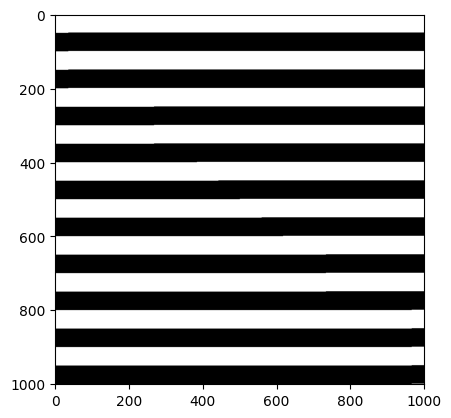

In [4]:
reshetka(100,np.pi / 2)

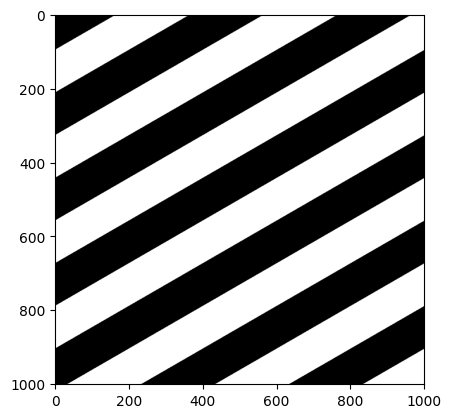

In [5]:
reshetka(200,np.pi / 3)

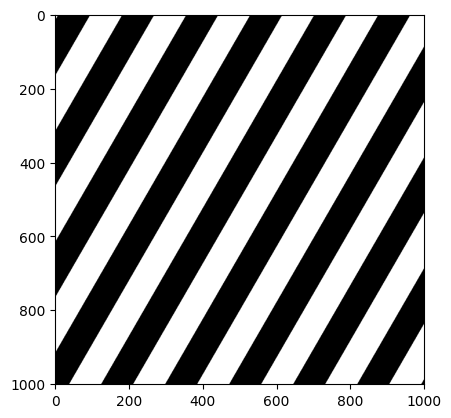

In [6]:
reshetka(150,np.pi / 6)

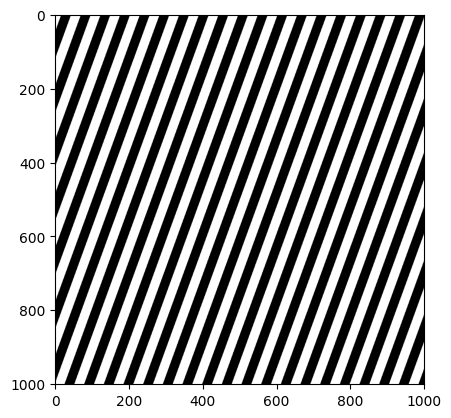

In [7]:
reshetka(50,np.pi / 9)

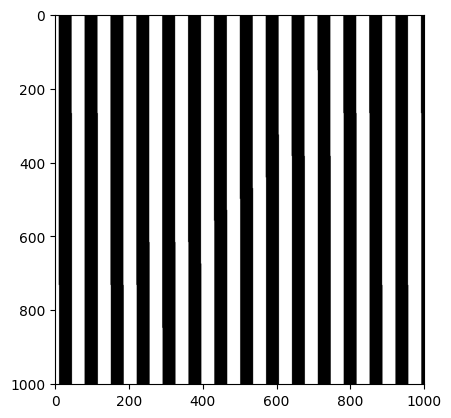

In [8]:
reshetka(70,np.pi)

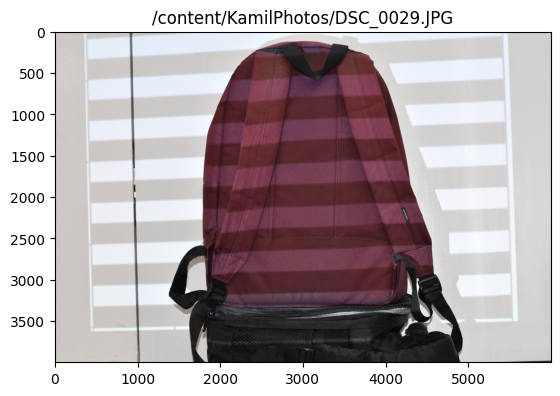

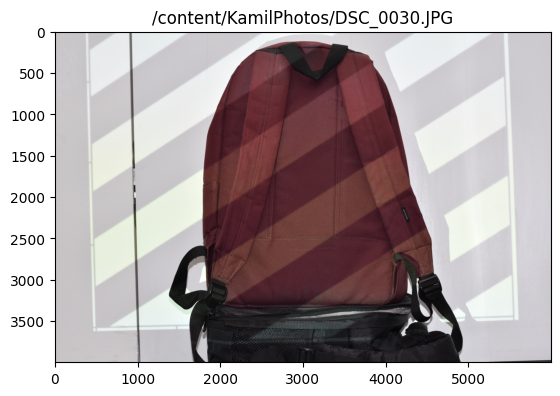

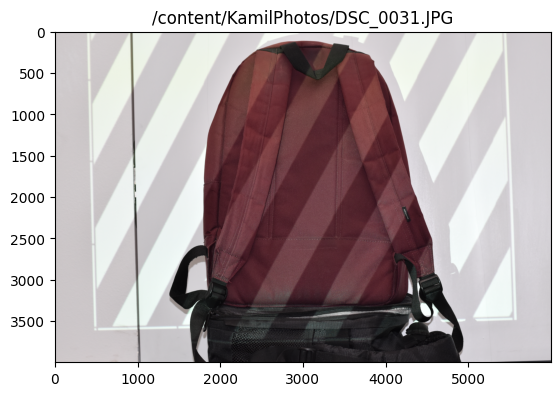

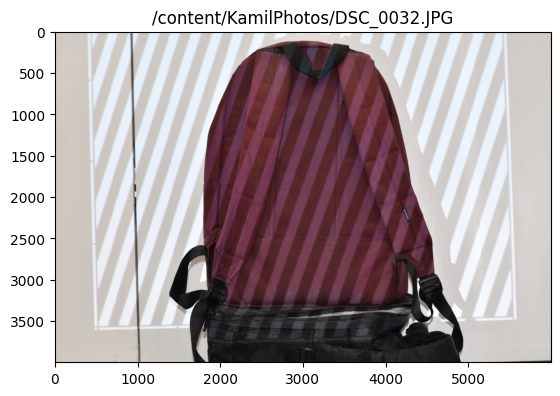

{'/content/KamilPhotos/DSC_0029.JPG': array([[[204, 199, 196],
         [205, 200, 197],
         [204, 199, 195],
         ...,
         [208, 207, 205],
         [208, 208, 206],
         [208, 208, 208]],
 
        [[204, 201, 194],
         [204, 201, 194],
         [206, 203, 196],
         ...,
         [212, 208, 207],
         [211, 207, 206],
         [211, 207, 206]],
 
        [[206, 201, 197],
         [203, 198, 194],
         [204, 200, 197],
         ...,
         [209, 207, 208],
         [211, 207, 206],
         [210, 206, 205]],
 
        ...,
 
        [[211, 204, 198],
         [212, 205, 199],
         [212, 204, 201],
         ...,
         [ 50,  51,  53],
         [ 52,  52,  54],
         [ 52,  52,  54]],
 
        [[211, 206, 203],
         [211, 206, 203],
         [211, 206, 202],
         ...,
         [ 50,  51,  53],
         [ 51,  51,  53],
         [ 52,  52,  54]],
 
        [[212, 207, 203],
         [211, 206, 202],
         [211, 206, 203],
     

In [18]:
load_images(["/content/KamilPhotos/DSC_0029.JPG","/content/KamilPhotos/DSC_0030.JPG","/content/KamilPhotos/DSC_0031.JPG","/content/KamilPhotos/DSC_0032.JPG"])

In [9]:
import cv2

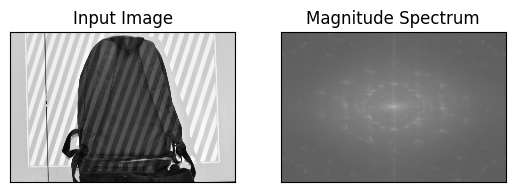

True

In [52]:
img = cv2.imread('/content/KamilPhotos/DSC_0032.JPG',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 10*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
#magnitude_spectrum = 1*(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

new_spectr = magnitude_spectrum

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(new_spectr, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('output_image.jpg', new_spectr)

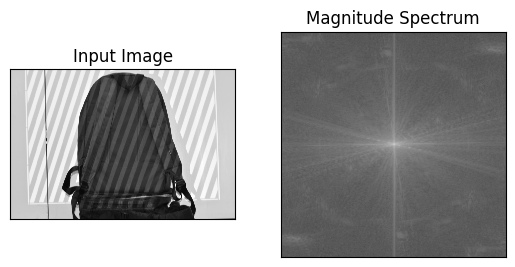

True

In [49]:
img = cv2.imread('/content/KamilPhotos/DSC_0032.JPG',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 10*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
#magnitude_spectrum = 1*(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

new_spectr = magnitude_spectrum[1500:2500,2500:3500]

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(new_spectr, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('output_image.jpg', new_spectr)

If you find the frequencies corresponding to the grating in the Fourier spectrum and set them to zero, you will be able to restore the picture without the grating.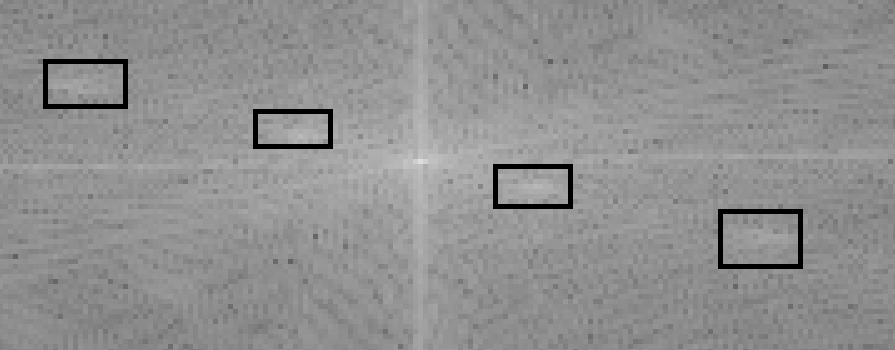

l - array with coordinates of the left corners of black rectangles (see the picture above)

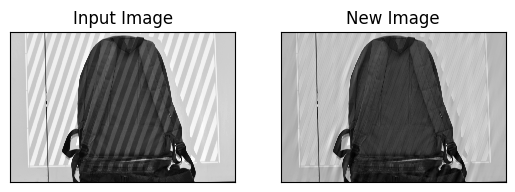

In [60]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/KamilPhotos/DSC_0032.JPG',0)
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.ones((rows,cols,2),np.uint8)
l= [[2967, 1990],[3015, 2001],[2925, 1981],[3060, 2010]]
for arr in l:
    mask[arr[1]:arr[1]+8,arr[0]:arr[0]+15] = 0

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('New Image'), plt.xticks([]), plt.yticks([])
plt.show()

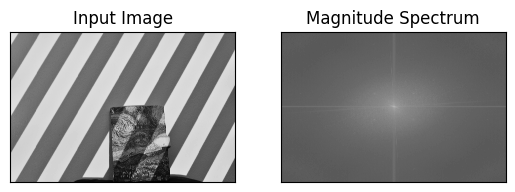

True

In [73]:
img = cv2.imread('DSC_0046.JPG',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 10*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
#magnitude_spectrum = 1*(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

new_spectr = magnitude_spectrum

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(new_spectr, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('output_image.jpg', new_spectr)


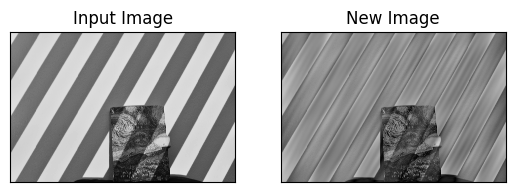

In [82]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('DSC_0046.JPG',0)
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.ones((rows,cols,2),np.uint8)
l= [[2982, 1990],[2969,1987],[2992,1995],[3004,2001],[3015,2005],[3027,2009]]
for arr in l:
    mask[arr[1]:arr[1]+5,arr[0]:arr[0]+5] = 0

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('New Image'), plt.xticks([]), plt.yticks([])
plt.show()

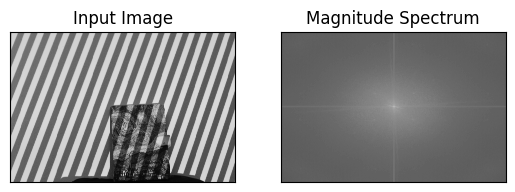

True

In [83]:
img = cv2.imread('DSC_0047.JPG',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 10*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
#magnitude_spectrum = 1*(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

new_spectr = magnitude_spectrum

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(new_spectr, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('output_image.jpg', new_spectr)

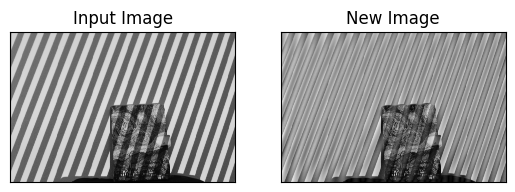

In [87]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('DSC_0047.JPG',0)
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.ones((rows,cols,2),np.uint8)
l= [[2981, 1994],[3016,2003]]
for arr in l:
    mask[arr[1]:arr[1]+5,arr[0]:arr[0]+5] = 0

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('New Image'), plt.xticks([]), plt.yticks([])
plt.show()

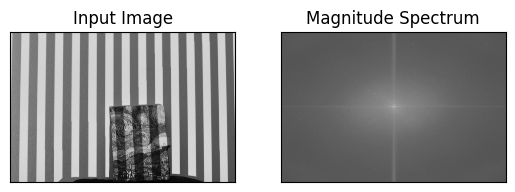

True

In [115]:
img = cv2.imread('DSC_0048.JPG',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 10*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
#magnitude_spectrum = 1*(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

new_spectr = magnitude_spectrum

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(new_spectr, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('output_image.jpg', new_spectr)

In [51]:
len(new_spectr[0])

1000

In [25]:
from google.colab.patches import cv2_imshow

In [ ]:
# TODO: Save generated images with periodic structure on hard drive

In [ ]:
# TODO: Load and render captured photos
# Total: 4 images

### 1.2 Processing of acquired dataset

In [97]:
def fft_image(image_name):
    """Calculates Fourier Transform image

    Args:
        image: image for which Fourier Transform image is calculated

    Returns:
        Fourier Transform image
    """

    # TODO: Develop function to calculate Fourier Transform image

    img = cv2.imread(image_name,0)
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum = 10*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    #magnitude_spectrum = 1*(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

    new_spectr = magnitude_spectrum

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(122),plt.imshow(new_spectr, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imwrite('output_image.jpg', new_spectr)
    return magnitude_spectrum

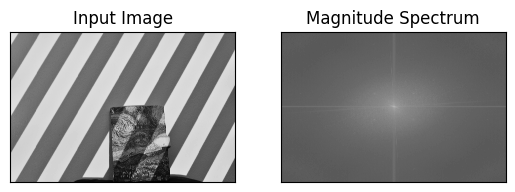

array([[112.08599 , 108.85116 , 104.31348 , ...,  98.726845, 104.31348 ,
        108.85116 ],
       [103.73383 , 100.59587 ,  96.81266 , ...,  98.51791 , 101.9657  ,
        104.83765 ],
       [ 99.90318 ,  99.38542 ,  98.45397 , ...,  78.09439 ,  89.494286,
         92.52724 ],
       ...,
       [ 99.90221 , 101.10103 ,  98.49135 , ...,  87.84667 ,  94.516594,
         99.20363 ],
       [ 99.90318 ,  92.52724 ,  89.494286, ...,  95.71037 ,  98.45397 ,
         99.38542 ],
       [103.73383 , 104.83765 , 101.9657  , ...,  91.32942 ,  96.81266 ,
        100.59587 ]], dtype=float32)

In [98]:
fft_image("DSC_0046.JPG")

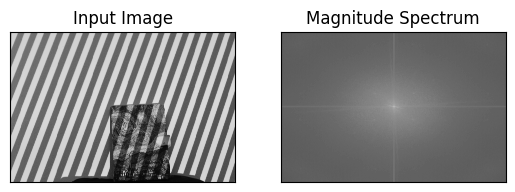

array([[111.412094, 110.9973  , 105.17854 , ...,  99.76248 , 105.17854 ,
        110.9973  ],
       [104.84878 , 104.35525 ,  94.30925 , ...,  98.94516 , 105.05241 ,
        107.2977  ],
       [ 98.79741 , 100.392006,  97.06962 , ...,  83.198044,  82.83474 ,
         93.32406 ],
       ...,
       [102.58588 , 101.996574,  98.249176, ...,  86.97106 ,  95.01499 ,
        100.84593 ],
       [ 98.79741 ,  93.32406 ,  82.83474 , ...,  93.54951 ,  97.06962 ,
        100.392006],
       [104.84878 , 107.2977  , 105.05241 , ...,  64.8869  ,  94.30925 ,
        104.35525 ]], dtype=float32)

In [99]:
fft_image("DSC_0047.JPG")

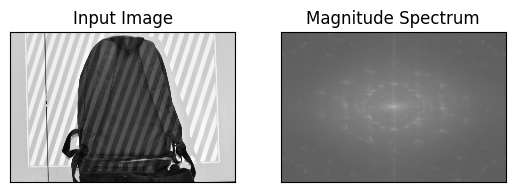

array([[127.57579 , 120.738   ,  95.7543  , ..., 110.72404 ,  95.7543  ,
        120.738   ],
       [115.25193 , 110.15969 ,  98.184586, ..., 107.76534 , 102.21062 ,
        111.2525  ],
       [109.3805  , 101.40381 ,  92.084595, ...,  93.95468 , 103.467606,
        109.93315 ],
       ...,
       [109.9714  , 108.170944,  97.00166 , ...,  92.297745,  95.15426 ,
        104.65477 ],
       [109.3805  , 109.93315 , 103.467606, ...,  96.45181 ,  92.084595,
        101.40381 ],
       [115.25193 , 111.2525  , 102.21062 , ..., 103.46154 ,  98.184586,
        110.15969 ]], dtype=float32)

In [100]:
fft_image('/content/KamilPhotos/DSC_0032.JPG')


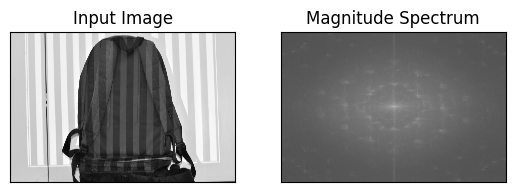

In [93]:
fft_image('/content/KamilPhotos/DSC_0033.JPG')

In [ ]:
# TODO: Calculate Fourier Transform image of captured photos
# Total: 4 Fourier Transform images

In [ ]:
# TODO: Display Fourier Transform image of captured photos
# Total: 4 images

*`TODO:`* Qualitatively describe your observations of the changes to the Fourier spectrum as a function of ∆x and θ

In [120]:
pip install SSIM_PIL

In [121]:
from SSIM_PIL import compare_ssim
from PIL import Image



In [111]:
def fouirer_filter(im_name, l,a,b):
    """Filters image to get rid of `striped` illumination pattern

    Args:
        source: original image with hardware overlayed `striped` illumination pattern
        theta: angle between stripes and x-axis
        shape: shape of resulting image

    Returns:
        Filtered image
    """

    # TODO: Develop function to filter image

    img = cv2.imread(im_name,0)
    fft_image(im_name)
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = img.shape
    crow,ccol = rows//2 , cols//2

    # create a mask first, center square is 1, remaining all zeros
    mask = np.ones((rows,cols,2),np.uint8)
    for arr in l:
        mask[arr[1]:arr[1]+a,arr[0]:arr[0]+b] = 0

    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
    plt.title('New Image'), plt.xticks([]), plt.yticks([])
    plt.show()


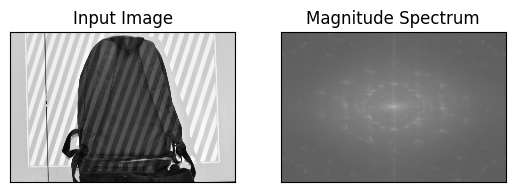

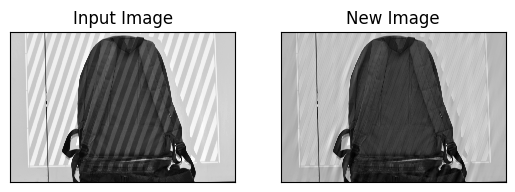

In [112]:
fouirer_filter('/content/KamilPhotos/DSC_0032.JPG',[[2967, 1990],[3015, 2001],[2925, 1981],[3060, 2010]],8,15)

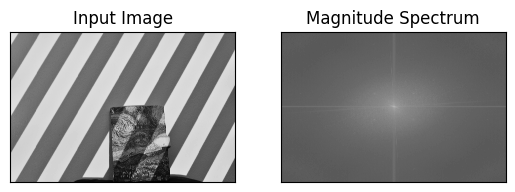

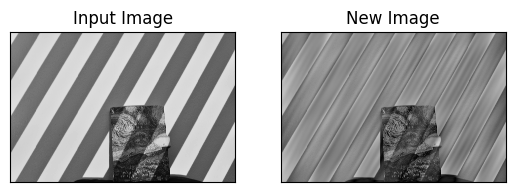

In [113]:
fouirer_filter('DSC_0046.JPG', [[2982, 1990],[2969,1987],[2992,1995],[3004,2001],[3015,2005],[3027,2009]],5,5)

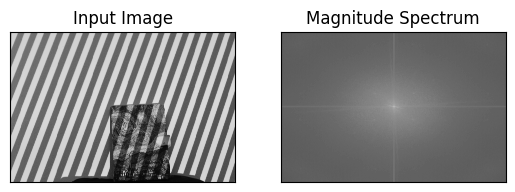

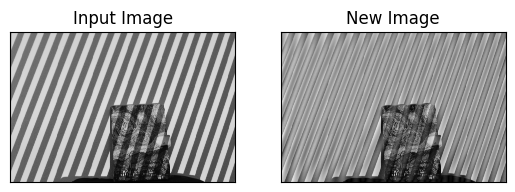

In [114]:
fouirer_filter('DSC_0047.JPG', [[2981, 1994],[3016,2003]],5,5)

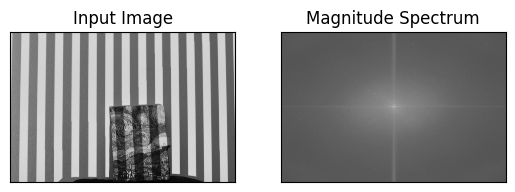

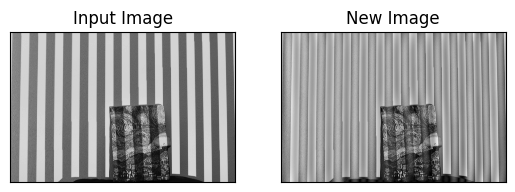

In [118]:
fouirer_filter('DSC_0048.JPG', [[2983, 1996],[3011,1997]],6,6)

In [2]:
def fouirer_filter_SSIM(im_name, l,a,b):
    """Filters image to get rid of `striped` illumination pattern

    Args:
        source: original image with hardware overlayed `striped` illumination pattern
        theta: angle between stripes and x-axis
        shape: shape of resulting image

    Returns:
        Filtered image
    """

    # TODO: Develop function to filter image

    img = cv2.imread(im_name,0)
    fft_image(im_name)
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = img.shape
    crow,ccol = rows//2 , cols//2

    # create a mask first, center square is 1, remaining all zeros
    mask = np.ones((rows,cols,2),np.uint8)
    for arr in l:
        mask[arr[1]:arr[1]+a,arr[0]:arr[0]+b] = 0

    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
    plt.title('New Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    #  Compare images using CPU-only version
    image1 = Image.open(im_name)
    cv2.imwrite('output_image.jpg', img_back)
    image2 = Image.open('output_image.jpg')
    # gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    # cv2.imshow('Gray image', gray)
    value1 = compare_ssim(img,  img_back, GPU=False)
    print("SSIM:",value1)

In [3]:
fouirer_filter_SSIM('/content/KamilPhotos/DSC_0032.JPG',[[2967, 1990],[3015, 2001],[2925, 1981],[3060, 2010]],8,15)

NameError: ignored

*`TODO:`* Qualitatively describe your observations and suggest a concept to eliminate the artifacts in the filtered images.

## 2 Bokeh deconvolution

### 2.1 Image recovery from software-originated Bokeh effect

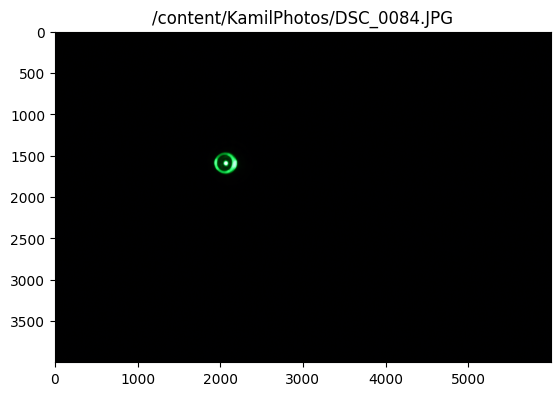

{'/content/KamilPhotos/DSC_0084.JPG': array([[[1, 1, 0],
         [1, 1, 0],
         [0, 1, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [1, 1, 1]],
 
        [[1, 0, 0],
         [1, 0, 0],
         [0, 0, 2],
         ...,
         [0, 1, 3],
         [0, 2, 1],
         [0, 1, 0]],
 
        [[2, 0, 3],
         [2, 0, 3],
         [1, 1, 3],
         ...,
         [0, 0, 0],
         [0, 1, 0],
         [0, 1, 0]],
 
        ...,
 
        [[1, 1, 0],
         [0, 0, 0],
         [1, 0, 0],
         ...,
         [1, 0, 0],
         [1, 0, 0],
         [2, 0, 1]],
 
        [[0, 3, 2],
         [0, 1, 0],
         [0, 1, 0],
         ...,
         [0, 1, 0],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[4, 0, 3],
         [4, 0, 3],
         [1, 1, 0],
         ...,
         [1, 0, 0],
         [0, 0, 0],
         [1, 1, 0]]], dtype=uint8)}

In [10]:
# TODO: Load photo of decoration lights
# Total: 1 image
load_images(["/content/KamilPhotos/DSC_0084.JPG"])

In [ ]:
def make_synthetic_psf(shape):
    """Generates synthetic PSF of specified shape

    Args:
        shape: shape of synthetic PSF

    Returns:
        Synthetic PSF as numpy array
    """

    # TODO: Develop function for synthetic PSF generation

    psf = np.zeros(shape)

    return psf

In [1]:
import numpy as np

def generate_synthetic_rhombus_psf(shape):
    """
    Generates a synthetic PSF of a rhombus shape.

    Args:
        shape: Shape of the synthetic PSF as a tuple (height, width).

    Returns:
        Synthetic PSF as a numpy array.
    """
    if not isinstance(shape, tuple) or len(shape) != 2:
        raise ValueError("The 'shape' argument should be a tuple of two positive integers.")

    height, width = shape
    if height % 2 == 0 or width % 2 == 0:
        raise ValueError("Both height and width should be odd integers for a centered rhombus.")

    psf = np.zeros(shape, dtype=np.float32)

    center_x = width // 2
    center_y = height // 2

    # Set the rhombus shape
    for y in range(height):
        for x in range(width):
            if abs(x - center_x) + abs(y - center_y) <= min(center_x, center_y):
                psf[y, x] = 1.0

    # Normalize the PSF to have a total intensity of 1
    psf /= np.sum(psf)

    return psf

# Example usage:
psf_shape = (1451, 1451)  # Specify the shape of the PSF (e.g., 11x11)

synthetic_rhombus_psf = generate_synthetic_rhombus_psf(psf_shape)
plt.subplot(121),plt.imshow(synthetic_rhombus_psf, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

NameError: ignored

In [11]:
st= ". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ."

In [12]:
arr_big = list()
arr = list()
c = 0
for i in range(len(st)):

    if(st[i] == "."):
        arr.append(0)
        c+=1
    if(st[i] == "1"):
        arr.append(1)
        c+=1
    if c == 33:
        c = 0
        arr_big.append(arr)
        arr = list()


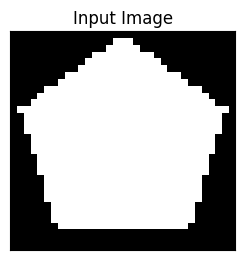

In [13]:
plt.subplot(121),plt.imshow(arr_big, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.signal import convolve2d as conv2

# img = np.zeros((500,500))
# img[100][100] = 1
# img[110][100] = 1
# img[400][400] = 1
#img = load_images(["/content/KamilPhotos/DSC_0084.JPG"])
img = cv2.imread("/content/KamilPhotos/DSC_0084.JPG",0)
#Sk = np.array(arr_big)
Sk = synthetic_rhombus_psf
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

psf = np.ones((5, 5)) / 25
new_photo = conv2(img, Sk, 'same')
#new_photo += 0.1 * astro.std() * rng.standard_normal(astro.shape)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.subplot(122),plt.imshow(new_photo, cmap = 'gray')

plt.title('Convolution'), plt.xticks([]), plt.yticks([])
plt.show()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.signal import convolve2d as conv2

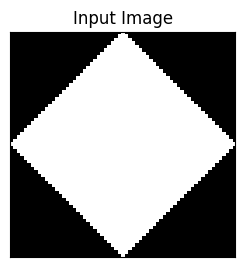

In [10]:
import numpy as np

def generate_synthetic_rhombus_psf(shape):
    """
    Generates a synthetic PSF of a rhombus shape.

    Args:
        shape: Shape of the synthetic PSF as a tuple (height, width).

    Returns:
        Synthetic PSF as a numpy array.
    """
    if not isinstance(shape, tuple) or len(shape) != 2:
        raise ValueError("The 'shape' argument should be a tuple of two positive integers.")

    height, width = shape
    if height % 2 == 0 or width % 2 == 0:
        raise ValueError("Both height and width should be odd integers for a centered rhombus.")

    psf = np.zeros(shape, dtype=np.float32)

    center_x = width // 2
    center_y = height // 2

    # Set the rhombus shape
    for y in range(height):
        for x in range(width):
            if abs(x - center_x) + abs(y - center_y) <= min(center_x, center_y):
                psf[y, x] = 1.0

    # Normalize the PSF to have a total intensity of 1
    psf /= np.sum(psf)

    return psf

# Example usage:
psf_shape = (65, 65)  # Specify the shape of the PSF (e.g., 11x11)

synthetic_rhombus_psf = generate_synthetic_rhombus_psf(psf_shape)
plt.subplot(121),plt.imshow(synthetic_rhombus_psf, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

In [11]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread("new_im.JPG")
gray = rgb2gray(img)

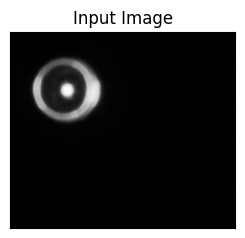

In [12]:
plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
gray.shape

(189, 217)

In [14]:
21-86

-65

In [15]:
Sk = synthetic_rhombus_psf


In [16]:
Sk.shape

(65, 65)

In [17]:
new_photo = conv2(gray, Sk, 'same')

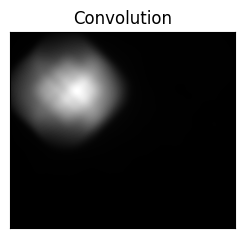

In [18]:
plt.subplot(122),plt.imshow(new_photo, cmap = 'gray')
plt.title('Convolution'), plt.xticks([]), plt.yticks([])
plt.show()

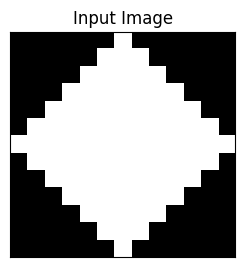

In [48]:
psf_shape = (13, 13)  # Specify the shape of the PSF (e.g., 11x11)

psf = generate_synthetic_rhombus_psf(psf_shape)
plt.subplot(121),plt.imshow(psf, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, restoration

deconvolved, _ = restoration.unsupervised_wiener(new_photo, psf)

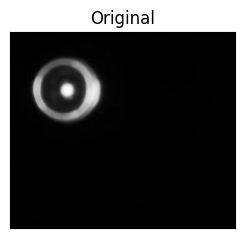

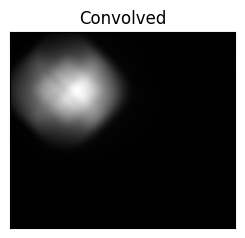

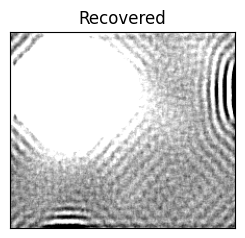

In [50]:
plt.subplot(122),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(122),plt.imshow(new_photo, cmap = 'gray')
plt.title('Convolved'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(122),plt.imshow(deconvolved, cmap = 'gray')
plt.title('Recovered'), plt.xticks([]), plt.yticks([])
plt.show()

If you take the same kernel (which was taken for convolution), then the picture will not work, however, if you take a kernel 5 times smaller, then the picture will become similar to the original, but with lower quality

In [ ]:
# TODO: Calculate convolution of original photo of decoration lights and synthetic PSF
# TODO: Bokeh effect should be perceptible
# Total: 1 image

In [ ]:
# TODO: Recover the original image from the convolved image
# Total: 1 image

In [ ]:
# TODO: Display the original image, the convolved Bokeh image, and the recovered one side-by-side
# Total: a row of 3 images

*`TODO:`* Describe what the custom shape of the PSF did to the original image and what are the differences in the recovered and the original photos

### 2.2 Image recovery from hardware-originated Bokeh effect

In [ ]:
# TODO: Load and render the captured photos of point light source with and without Bokeh
# Total: 2 image

In [ ]:
def estimate_psf(bokeh, ground_truth):
    """Estimates PSF of the camera from Bokeh and Ground truth image

    Args:
        bokeh: image with Bokeh-effect
        ground_truth: Sharp ground truth image

    Returns:
        PSF estimation
    """

    # TODO: Develop function to recover the sharp image of the decoration lights from the captured image with Bokeh effect

    psf = np.array([])

    return psf

In [ ]:
# TODO: Load and render the captured photos of decoration lights with and without Bokeh
# Total: 2 image

In [ ]:
# TODO: Display the estimated PSF
# Total: 2 image

In [ ]:
def recover_from_Bokeh(image, psf):
    """Recovers sharp image from image with hardware-originated Bokeh effect

    Args:
        image: image with Bokeh-effect
        psf: PSF of known shape (may required scaling or other adjustment)

    Returns:
        Sharp image of decoration lights
    """

    # TODO: Develop function to recover of the sharp image of the decoration lights from the captured image with Bokeh effect

    result = image

    return result

In [ ]:
# TODO: Display the restored image side-by-side with original photo of decoration lights without bokeh
# Total: a row of 2 images